<h1><center>Libreta semanal 2.1</center></h1>

<center>**Computación y Análisis de Datos Geofísicos**</center>

<center>**Evelin Martínez Izaguirre***</center>
<br />
*Unidad Multidisciplinaria de Docencia e Investigación (UMDI), Facultad de Ciencias, campus Juriquilla, Querétaro.
<br />
Universidad Nacional Autónoma de México. Boulevard Juriquilla 3001, Juriquilla, Querétaro, 76230, México
e-mail: evemi@ciencias.unam.mx.
_______________________________________________________________________________________________________________________________


<h3>Análisis Tiempo-Frecuencia</h3>
<div style="text-align: justify">

Pinto (2005) describe las 4 razones principales para su estudio:
<ul>  
<li>El análisis espectral permite conocer algo acerca del origen de la señal.</li>    

<li>La propagacipon de las ondas a través de un medio generalmente depende de la frecuencia.</li>  

<li>Es muy simple, ya que es una suma de senoides que pueden aparentar una gran complejidad analizando su señal temporal y se reduce a elementos frecuenciales puntuales mediante la transformada de Fourier.</li>
<br />
<li>Es una herramienta potente para la solución de ecuaciones diferenciales ordinarias y parciales.</li>

Además, Vera (s.a) menciona que mientras que una función  en el dominio temporal indica cómo la amplitud de la señal cambia en el tiempo, su representación en el dominio de la frecuencia permite conocer cuan a menudo esos cambios tienen lugar. 


<h3>Principio de incretidumbre</h3>

Fue desarrollado por Werner Heisenberg y establece la imposibilidad de determinar la posición y el momento de una partpicla en el campo de la mecánica cuántica.

Tratándose de las variables tiempo y frecuencia, este principio supone que una mejora en la resolución que se tiene para una de las variables empeora la resolucipon de la segunda variable, y viceversa, es decir, en una representacipon tiempo-frecuencia llega un punto límite en el que el ancho de banda o duración , para frecuencia y tiempo respectivamente no puede ser mejorado simúltaneamente (Pinto, 2005).

</ul>



</div>


**Cargar paqueterías**

In [3]:
using DSP

In [4]:
using Plots

In [5]:
pyplot()

Plots.PyPlotBackend()

**Cargar y reenombrar datos**

In [6]:
BHE=readdlm("MA02_BHE_2006-032-2-1-43.42.txt"); #columna 1 Tiempo ratum, columna 2 amplitudes, componente E-O
BHN=readdlm("MA02_BHN_2006-032-2-1-43.42.txt"); #Componente N-S
BHZ=readdlm("MA02_BHZ_2006-032-2-1-43.42.txt"); #Componente vertical

In [7]:
#Extraigo la segunda columna de los datos
ABHE=BHE[:,2];
ABHN=BHN[:,2];
ABHZ=BHZ[:,2];

In [8]:
#Banda de 0-5
#Filtro pasa bajos diseño Butterworth

responsetype=Lowpass(5, fs=40)
design=Butterworth(8)
sisfil=filt(digitalfilter(responsetype, design),ABHE);

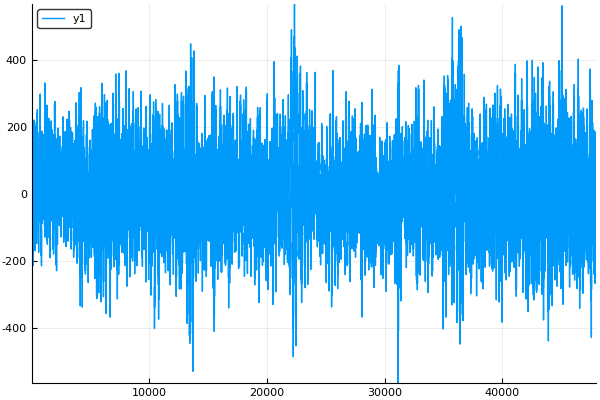

In [21]:
plot(sisfil)

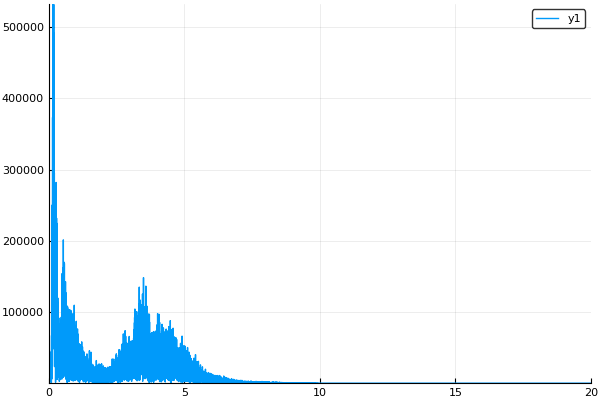

In [22]:

#Fourier
ft1 = abs.(fft(sisfil,1));
ftp1 = ft1[2:convert(Int64,(length(ft1)/2))] #Para que no tome en cuenta el elemento 1
fvec1 = collect(linspace(0,20,length(ftp1)));

plot(fvec1, ftp1)

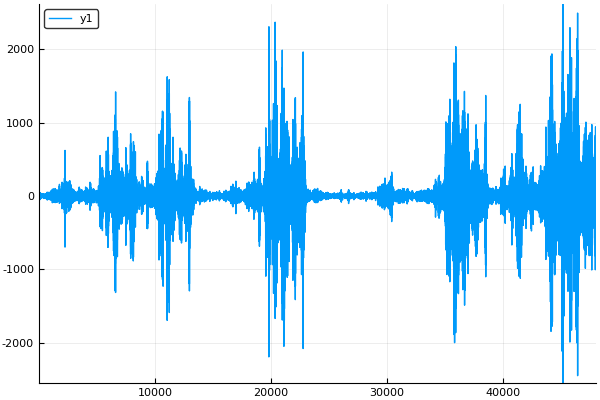

In [23]:
#Filtro pasa bandas de 10-15 diseño Butterworth
rp=Bandpass(10,15; fs=40)
dn=Butterworth(8)
bpass=filt(digitalfilter(rp, dn),ABHE);

plot(bpass)

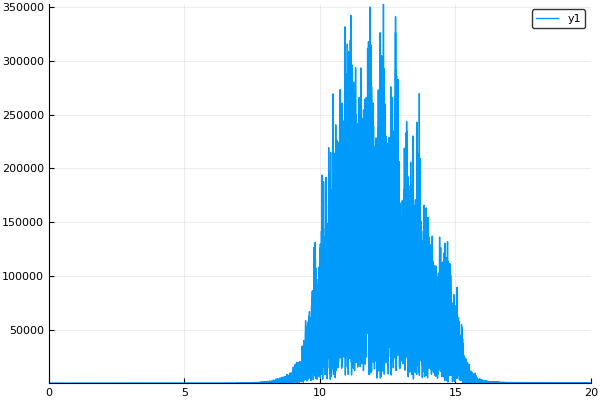

In [24]:
#Fourier
ff1 = abs.(fft(bpass,1));
ffp1 = ff1[2:convert(Int64,(length(ff1)/2))] #Para que no tome en cuenta el elemento 1
ffvec1 = collect(linspace(0,20,length(ffp1)));

plot(ffvec1, ffp1)

In [9]:
spe1=spectrogram(BHE[:,2],50,49,fs=40)

DSP.Periodograms.Spectrogram{Float64,DSP.Util.Frequencies}([4242.78 4368.97 … 3447.94 7216.2; 1661.04 1619.46 … 558.532 2230.33; … ; 2.87739 0.113314 … 1227.31 20.9125; 1.4045 0.05 … 598.418 3.1205], [0.0, 0.8, 1.6, 2.4, 3.2, 4.0, 4.8, 5.6, 6.4, 7.2  …  12.8, 13.6, 14.4, 15.2, 16.0, 16.8, 17.6, 18.4, 19.2, 20.0], 0.625:0.025:1199.375)

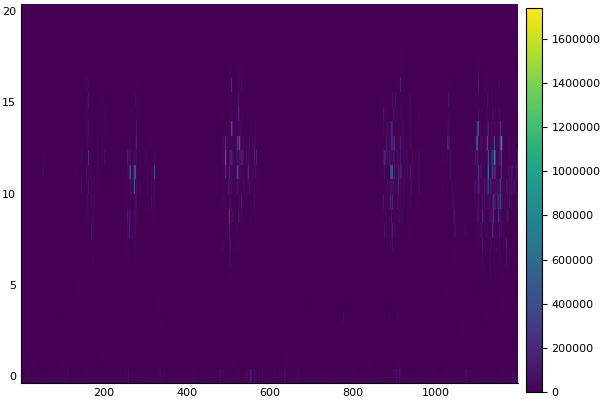

In [10]:
fig1=heatmap(spe1.time,spe1.freq,spe1.power, color=:viridis) #Espectograma

In [11]:
dt=1/40 #dt
tp1=collect(linspace(0, length(ABHE),length(ABHE)));
Tt=tp1*dt; #Tiempo total

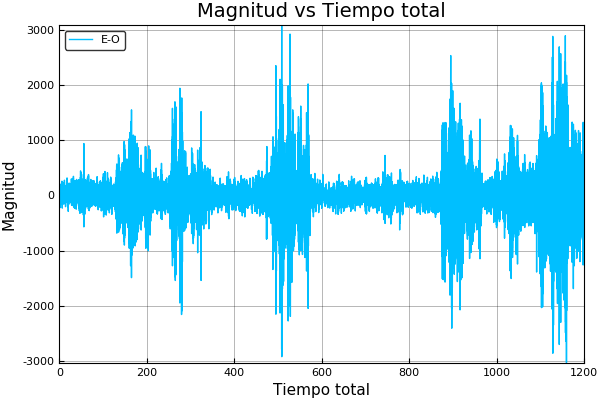

In [12]:
#Gráficas con tiempo total (Dominio del tiempo)
fig2=plot(Tt,ABHE, ylab="Magnitud", xlab="Tiempo total", title="Magnitud vs Tiempo total", box=:true, label="E-O", color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", xticks=(0:200:1200)) 

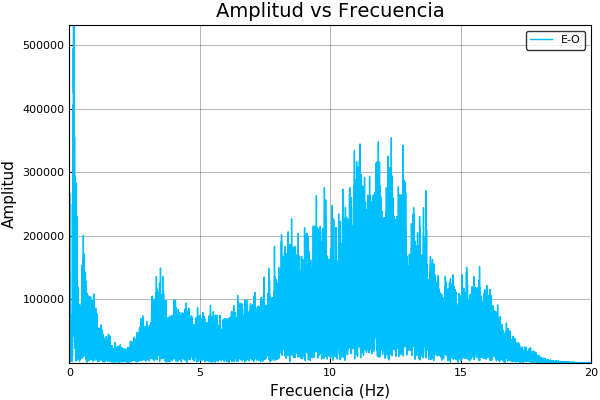

In [13]:
#Gráfica en el dominio de las frecuencias
ft1 = abs.(fft(ABHE,1));
ftp1 = ft1[2:convert(Int64,(length(ft1)/2))] #Para que no tome en cuenta el elemento 1
fvec1 = collect(linspace(0,20,length(ftp1)))

fig3 = plot(fvec1,ftp1, ylab="Amplitud", xlab="Frecuencia (Hz)", title="Amplitud vs Frecuencia", box=:true, label="E-O", color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", xticks=(0:5:20))

In [16]:
plot(fig3, fig2, fig1, layout=(2,1))

LoadError: [91mWhen doing layout, n (2) != n_override (3).  You're probably trying to force existing plots into a layout that doesn't fit them.[39m

<h3>Referencias</h3>
<ul>
    
<li>Vera E. (s.a). *Análisis Conjunto Tiempo-Frecuencia. Representaciones cuadráticas*. Universidad Nacional de Córdoba.</li>    

<li>Pinto M. (2005). *Procesamiento de señalaes utilizando el análisis tiempo-frecuencia*.  Tesis de maestría, IPN, Centro de Investigación y Desarrollo de Tecnología Digital, Tijuana, Baja California, México. </li>  

</ul>